# LSST Solar System Simulations, June 2021

Juric, Eggl, Jones, Fedorets, Cornwall, Berres, Chernyavskaya, Moeyens, Schwamb, et many many al.

This notebook illustrates what is available in the June 2021 version of the simulated LSST Solar System dataset. Use it as a starting point for your own experiments.

## Getting this notebook

This notebook is available from https://github.com/lsst-sssc/lsst-simulation. Open a terminal and clone it into your home directory to run it:
```
    git clone https://github.com/lsst-sssc/lsst-simulation
```

## Connecting and inspecting available tables

In [2]:
import psycopg2 as pg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
pwd = open("/home/shared/sssc-db-pass.txt").read()
con = pg.connect(database="lsst_solsys", user="sssc", password=pwd, host="epyc.astro.washington.edu", port="5432")

See which tables are available:

In [4]:
tables = pd.read_sql("SELECT table_name FROM information_schema.tables WHERE table_schema = 'public'", con)
tables = tables.set_index("table_name")
tables

""
table_name
ssobjects
sssources
mpcorb
diasources


See how many rows does each table have (this may take a minute or two).

In [5]:
%%time
tables["nrows"] = np.zeros(len(tables), dtype=int)
for table in tables.index:
    df = pd.read_sql(f"SELECT COUNT(*) FROM {table}", con, params=dict(table=table))
    tables["nrows"].loc[table] = df["count"].iloc[0]

CPU times: user 11.1 ms, sys: 1.17 ms, total: 12.3 ms
Wall time: 1min 11s


In [6]:
tables

,nrows
table_name,
ssobjects,10556741
sssources,1043415800
mpcorb,14600302
diasources,1043415800


Let's get a feel for the available data, by grabbing the top 5 rows of each table:

In [7]:
pd.read_sql("SELECT * FROM diasources LIMIT 5", con)

,diasourceid,ccdvisitid,diaobjectid,ssobjectid,_name,ssobjectreassoctime,midpointtai,ra,rasigma,decl,declsigma,ra_decl_cov,snr,filter,mag,magsigma,_v,_magtrue,_ratrue,_dectrue
0,1952839109036039781,122231,1537215218520783399,819889643154482779,S1005CYCa,60039.037419,60039.037419,129.590684,0.000009,12.003733,0.000009,0.0,16.698526,i,21.043230,0.063147,21.521744,21.066744,129.590684,12.003725
1,1486543917817498729,123098,-7037468574229910592,5786782821283451137,S1005D4qa,60040.005246,60040.005246,124.049298,0.000010,-5.136787,0.000010,0.0,13.551331,i,21.699242,0.077302,22.062727,21.607727,124.049304,-5.136777
2,8744810120905494086,124777,8686809464008266824,-9093662608188820544,S1005D66a,60041.348960,60041.348960,283.045411,0.000008,-33.137396,0.000008,0.0,11.022760,y,21.476673,0.094285,21.766966,21.463966,283.045401,-33.137406
3,3452285572810631019,124834,-1859933907867084349,-9093662608188820544,S1005D66a,60041.375001,60041.375001,283.050372,0.000008,-33.138294,0.000008,0.0,11.308365,y,21.415295,0.092001,21.766676,21.463676,283.050357,-33.138322
4,-1529909586803787453,124861,3661636550541166030,-9093662608188820544,S1005D66a,60041.387444,60041.387444,283.052716,0.000007,-33.138754,0.000007,0.0,12.064641,y,21.430834,0.086458,21.766537,21.463537,283.052719,-33.138756


In [8]:
pd.read_sql("SELECT * FROM sssources LIMIT 5", con)

,ssobjectid,diasourceid,mpcuniqueid,eclipticlambda,eclipticbeta,galacticl,galacticb,phaseangle,heliocentricdist,topocentricdist,...,heliocentricz,heliocentricvx,heliocentricvy,heliocentricvz,topocentricx,topocentricy,topocentricz,topocentricvx,topocentricvy,topocentricvz
0,819889643154482779,1952839109036039781,0,128.836575,-6.258677,213.949948,29.104339,18.748798,2.842328,2.284481,...,0.374356,-0.004101,-0.008415,-0.000889,-1.424062,1.721966,0.475116,-0.008015,0.007075,0.005753
1,5786782821283451137,1486543917817498729,0,127.700247,-24.230133,227.644419,16.234911,17.612328,3.106055,2.617551,...,-0.341533,-0.004793,-0.007634,-0.003896,-1.459697,2.160078,-0.234359,-0.008954,0.007755,0.002716
2,-9093662608188820544,8744810120905494086,0,281.072220,-10.198162,2.838461,-14.577027,19.033407,3.053244,2.785494,...,-1.638718,0.009758,-0.001617,-0.000669,0.526492,-2.272270,-1.522687,0.004808,0.013617,0.005900
3,-9093662608188820544,3452285572810631019,0,281.076340,-10.199436,2.839294,-14.581200,19.032654,3.053253,2.785145,...,-1.638735,0.009758,-0.001616,-0.000669,0.526617,-2.271916,-1.522533,0.004791,0.013579,0.005900
4,-9093662608188820544,-1529909586803787453,0,281.078284,-10.200073,2.839653,-14.583186,19.032290,3.053257,2.784979,...,-1.638743,0.009758,-0.001616,-0.000669,0.526676,-2.271747,-1.522460,0.004785,0.013561,0.005899


In [9]:
pd.read_sql("SELECT * FROM ssobjects LIMIT 5", con)

,ssobjectid,discoverysubmissiondate,firstobservationdate,arc,numobs,moid,moidtrueanomaly,moideclipticlongitude,moiddeltav,uh,...,yg12,yherr,yg12err,yh_yg12_cov,ychi2,yndata,maxextendedness,minextendedness,medianextendedness,flags
0,668135024989,60797.136495,60790.136495,0.000000,1,0.0,0.0,0.0,0.0,None,...,NaN,NaN,NaN,NaN,NaN,0,0.0,0.0,0.0,0
1,3033569589766,63480.233685,63473.233685,1.975244,3,0.0,0.0,0.0,0.0,None,...,NaN,NaN,NaN,NaN,NaN,0,0.0,0.0,0.0,0
2,3148445770109,59937.159828,59930.159828,2693.060000,3,0.0,0.0,0.0,0.0,None,...,NaN,NaN,NaN,NaN,NaN,0,0.0,0.0,0.0,0
3,3369984299447,60203.374981,60196.374981,2582.777000,107,0.0,0.0,0.0,0.0,None,...,0.345189,0.087608,0.133565,0.010005,0.571543,7,0.0,0.0,0.0,0
4,3643818542061,59917.313961,59910.313961,46.793457,10,0.0,0.0,0.0,0.0,None,...,NaN,NaN,NaN,NaN,NaN,0,0.0,0.0,0.0,0


In [10]:
pd.read_sql("SELECT * FROM mpcorb LIMIT 5", con)

,mpcdesignation,mpcnumber,ssobjectid,mpch,mpcg,epoch,tperi,peri,node,incl,...,arc,arcstart,arcend,rms,pertsshort,pertslong,computer,flags,fulldesignation,lastincludedobservation
0,SR000001a,0,-2658575675934308610,7.95,0.15,54800.0,52354.06796,47.02487,66.70177,0.0,...,0.0,0.0,0.0,0.0,None,None,None,0,None,0.0
1,SR000002a,0,1638696702905544284,11.90,0.15,54800.0,54255.95952,111.14332,149.76906,0.0,...,0.0,0.0,0.0,0.0,None,None,None,0,None,0.0
2,SR000003a,0,-6148727610239885338,7.58,0.15,54800.0,32718.27775,86.93460,157.72377,0.0,...,0.0,0.0,0.0,0.0,None,None,None,0,None,0.0
3,SR000004a,0,2476339031007217136,12.99,0.15,54800.0,49162.23730,357.05184,318.01916,0.0,...,0.0,0.0,0.0,0.0,None,None,None,0,None,0.0
4,SR000006a,0,-6439077407999146266,9.28,0.15,54800.0,-13278.77515,302.03901,292.49508,0.0,...,0.0,0.0,0.0,0.0,None,None,None,0,None,0.0


### Plot a visit

In [11]:
%%time
sql = """
    SELECT
        ssObjectId, ra, decl, ccdVisitId, midPointTai
    FROM
        diaSources
    WHERE
        ccdVisitId = 126272
"""
df = pd.read_sql(sql, con)

CPU times: user 5.96 ms, sys: 2.46 ms, total: 8.42 ms
Wall time: 45.4 ms


Text(0.5, 1.0, 'Visit 126272 (MJD 60043.17665)')

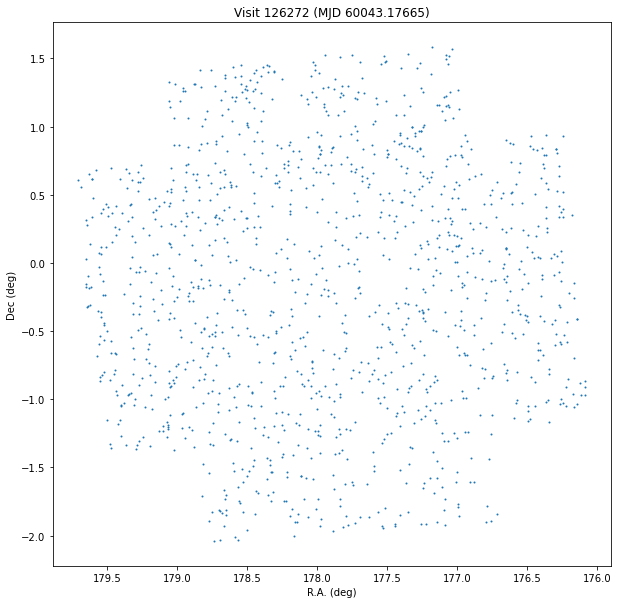

In [12]:
plt.figure(figsize=(10, 10))
plt.scatter(df["ra"], df["decl"], s=1)
plt.gca().invert_xaxis()
plt.xlabel("R.A. (deg)")
plt.ylabel("Dec (deg)")
plt.title(f"Visit {df['ccdvisitid'].iloc[0]} (MJD {df['midpointtai'].iloc[0]:.5f})")

Now grab the same data in ecliptic coordinates:

In [13]:
%%time
sql = """
    SELECT
        eclipticLambda as lon, eclipticBeta as lat, ccdVisitId, midPointTAI
    FROM
        diaSources JOIN ssSources USING(diaSourceId)
    WHERE
        ccdVisitId = 126272
"""
df = pd.read_sql(sql, con)

CPU times: user 59 ms, sys: 6.12 ms, total: 65.1 ms
Wall time: 25.3 s


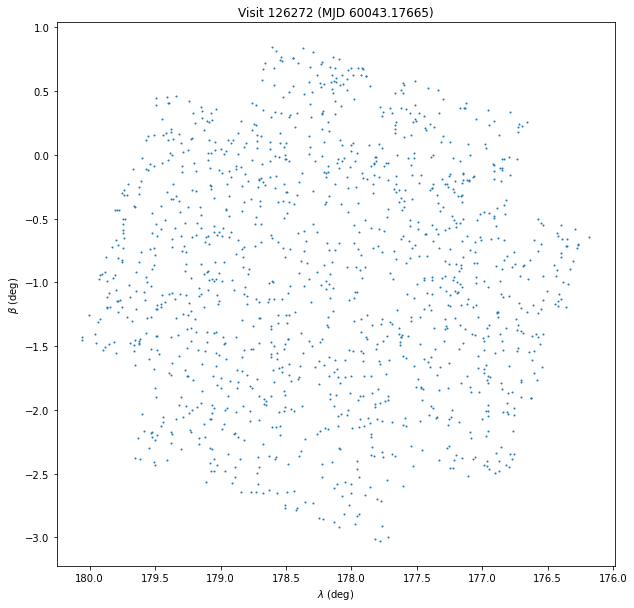

In [14]:
plt.figure(figsize=(10, 10))
plt.scatter(df["lon"], df["lat"], s=1)
plt.gca().invert_xaxis()
plt.xlabel(r"$\lambda$ (deg)")
plt.ylabel(r"$\beta$ (deg)")
plt.title(f"Visit {df['ccdvisitid'].iloc[0]} (MJD {df['midpointtai'].iloc[0]:.5f})");

### Plot a night

In [15]:
%%time
sql = """
    SELECT
        ssObjectId, ra, decl, ccdVisitId, midPointTai
    FROM
        diaSources
    WHERE
        midPointTai BETWEEN 60000-0.5 AND 60000+0.5
"""
df = pd.read_sql(sql, con)

CPU times: user 836 ms, sys: 148 ms, total: 984 ms
Wall time: 4.36 s


Text(0.5, 1.0, 'Night MJD 60000')

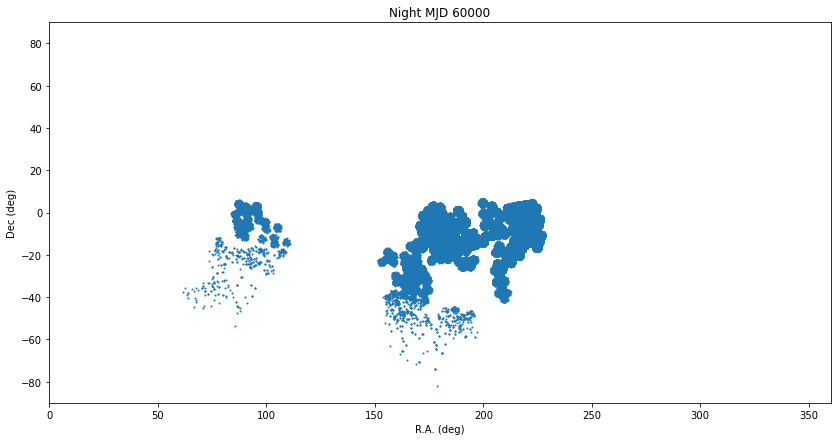

In [16]:
plt.figure(figsize=(14, 7))
plt.scatter(df["ra"], df["decl"], s=1)
plt.gca().invert_xaxis()
plt.xlabel("R.A. (deg)")
plt.ylabel("Dec (deg)")
plt.xlim(0, 360)
plt.ylim(-90, 90)
plt.title(f"Night MJD 60000")

### First month of the survey

In [17]:
t0 = pd.read_sql("SELECT MIN(midPointTai) from diaSources", con)["min"].iloc[0]
t0

59853.98564424414

In [18]:
%%time
sql = """
    SELECT
        ra, decl
    FROM
        diaSources
    WHERE
        midPointTai BETWEEN %(start)s AND %(end)s
"""
df = pd.read_sql(sql, con, params=dict(start=t0, end=t0+30))

CPU times: user 12.6 s, sys: 1.97 s, total: 14.6 s
Wall time: 23.1 s


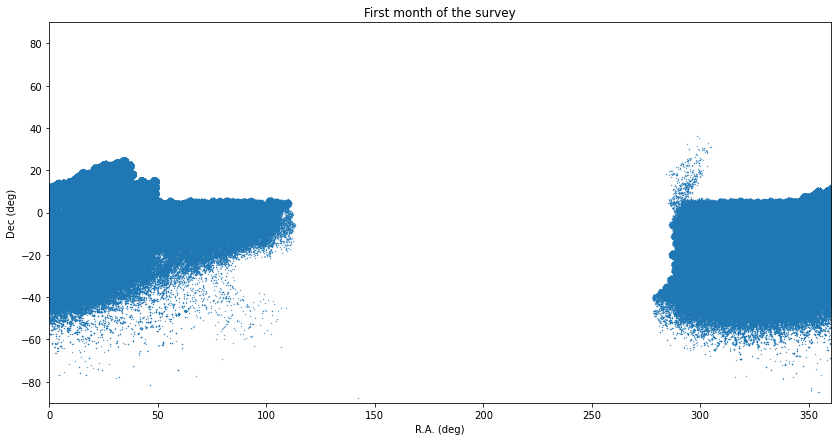

In [20]:
plt.figure(figsize=(14, 7))
plt.scatter(df["ra"], df["decl"], s=.1)
plt.gca().invert_xaxis()
plt.xlabel("R.A. (deg)")
plt.ylabel("Dec (deg)")
plt.xlim(0, 360)
plt.ylim(-90, 90)
plt.title(f"First month of the survey");

### Plot a phase curve

In [21]:
sql = """
    SELECT
        mpcdesignation, ssObjects.ssObjectId, mag, magSigma, filter, midPointTai as mjd, ra, decl, phaseAngle,
        topocentricDist, heliocentricDist
    FROM
        mpcorb
        JOIN ssObjects USING (ssobjectid)
        JOIN diaSources USING (ssobjectid)
        JOIN ssSources USING (diaSourceid)
    WHERE
        mpcdesignation = 'S00001vAa' and filter='r'
"""
df = pd.read_sql(sql, con)
# Distance correction
df["cmag"] = df["mag"] - 5*np.log10(df["topocentricdist"]*df["heliocentricdist"])
df.head()

,mpcdesignation,ssobjectid,mag,magsigma,filter,mjd,ra,decl,phaseangle,topocentricdist,heliocentricdist,cmag
0,S00001vAa,8050632269120433289,20.652550,0.013050,r,62352.235856,338.662138,-15.892054,14.838730,0.595123,1.578381,20.788458
1,S00001vAa,8050632269120433289,20.670551,0.016261,r,62352.244968,338.657501,-15.893365,14.830055,0.595161,1.578451,20.806224
2,S00001vAa,8050632269120433289,20.605118,0.010641,r,62360.313185,334.722045,-16.968608,7.679678,0.635753,1.639855,20.514649
3,S00001vAa,8050632269120433289,20.660650,0.018832,r,62251.421038,332.847465,-15.415406,96.779530,0.302469,0.924456,23.427812
4,S00001vAa,8050632269120433289,22.143944,0.040766,r,61286.975565,242.153201,-24.872374,51.970360,0.893512,1.272925,21.864428


Now make a plot:

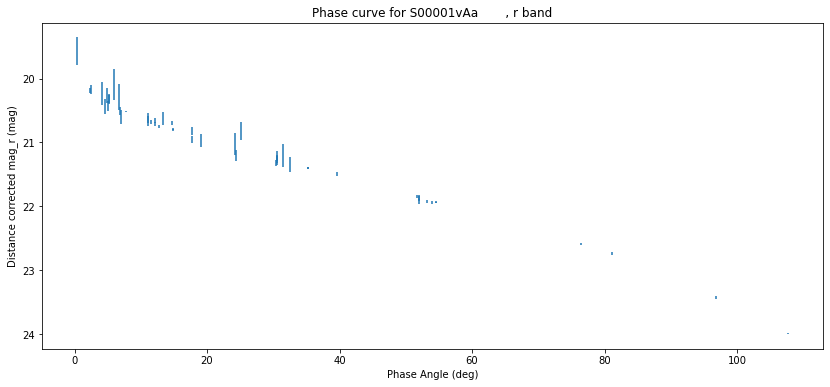

In [22]:
plt.figure(figsize=(14, 6))
plt.errorbar(df["phaseangle"], df["cmag"], df["magsigma"], ls='none')
plt.gca().invert_yaxis()
plt.xlabel("Phase Angle (deg)")
plt.ylabel("Distance corrected mag_r (mag)")
plt.title(f'Phase curve for {df["mpcdesignation"].iloc[0]}, r band');

Now grab our (H, G) fit, and overplot it

In [23]:
ssoId = int(df["ssobjectid"].iloc[0])
hg = pd.read_sql("SELECT rH, rG12, rHErr, rG12Err, rChi2 FROM ssObjects WHERE ssObjectId=%(ssoId)s", con, params=dict(ssoId=ssoId))
hg

,rh,rg12,rherr,rg12err,rchi2
0,19.9568,0.150825,0.009669,0.004122,1.167215


H=19.96±0.00967, G=0.15±0.00412, χ2/dof=1.167


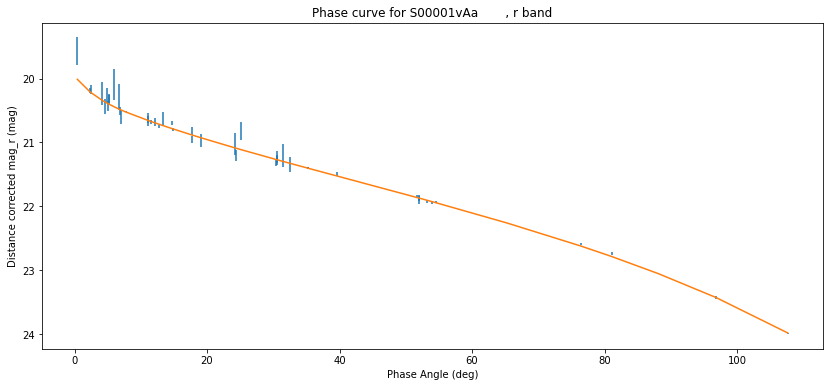

In [25]:
plt.figure(figsize=(14, 6))
plt.errorbar(df["phaseangle"], df["cmag"], df["magsigma"], ls='none')
plt.gca().invert_yaxis()
plt.xlabel("Phase Angle (deg)")
plt.ylabel("Distance corrected mag_r (mag)")
plt.title(f'Phase curve for {df["mpcdesignation"].iloc[0]}, r band')

from sbpy.photometry import HG
H, G, sigmaH, sigmaG, chi2dof = hg.iloc[0]
_ph = sorted(df["phaseangle"])
_mag = HG.evaluate(np.deg2rad(_ph), H, G)
plt.plot(_ph, _mag)
print(f"H={H:.2f}±{sigmaH:.3}, G={G:.2f}±{sigmaG:.3}, χ2/dof={chi2dof:.3f}")

### Look at the input population

This is just S3M, so it should correspond to the plots from the Grav et al. 2011 paper.

Text(0, 0.5, 'Objects in bin')

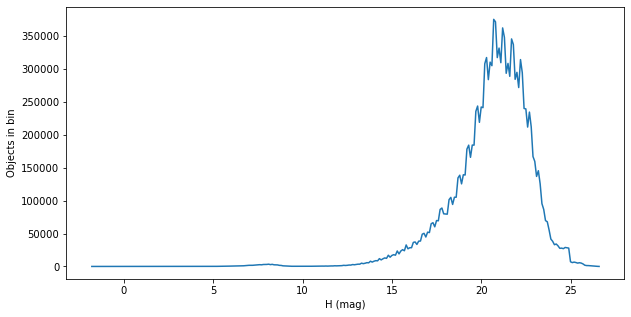

In [26]:
sql = """
    SELECT
        FLOOR(mpcH*10)/10 AS binH, count(*)
    FROM
        mpcorb
    GROUP BY binH
"""
df = pd.read_sql(sql, con)
plt.figure(figsize=(10, 5))
plt.plot(df["binh"], df["count"])
plt.xlabel("H (mag)")
plt.ylabel("Objects in bin")